# **FINAL GROUP PROJECT - INSY 695 - Enterprise Data Science**

# **Mobile Phone Price Prediction**

**USE CASE:** The aim of this project is to build a model to predict customer churn (that is, to predict which customers will cancel their subscriptions)

# FRAMING THE PROBLEM

More details about framing the problem....

## SETUP WORKBOOK

**IMPORT PACKAGES**

In [12]:
import pandas as pd
import numpy as np
!pip install pandas_profiling
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

#!pip install pyjanitor

import janitor as jn
from sklearn import (
    metrics,
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)

!pip install yellowbrick

from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

**IMPORT DATA**

Source: Kaggle

Link: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [38]:
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/E%20Commerce%20Dataset.csv"
df = pd.read_csv(url)

In [39]:
url2 = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/Data%20Dictionary.csv"
data_dict = pd.read_csv(url2)

In [40]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


**DATA DICTIONARY**

In [17]:
data_dict.head(10)
data_dict = data_dict.drop('Data', axis=1)
data_dict.style.set_properties(subset=['Discerption'], **{'width': '400px'})

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or website
9,NumberOfDeviceRegistered,Total number of deceives is registered on particular customer


In [18]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# 1 - EXPLORATORY DATA ANALYSIS

## Data Exploration

In [19]:
df.shape

(5630, 20)

### Check datatypes

In [20]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

Number of each type of column

Text(0, 0.5, 'Data type')

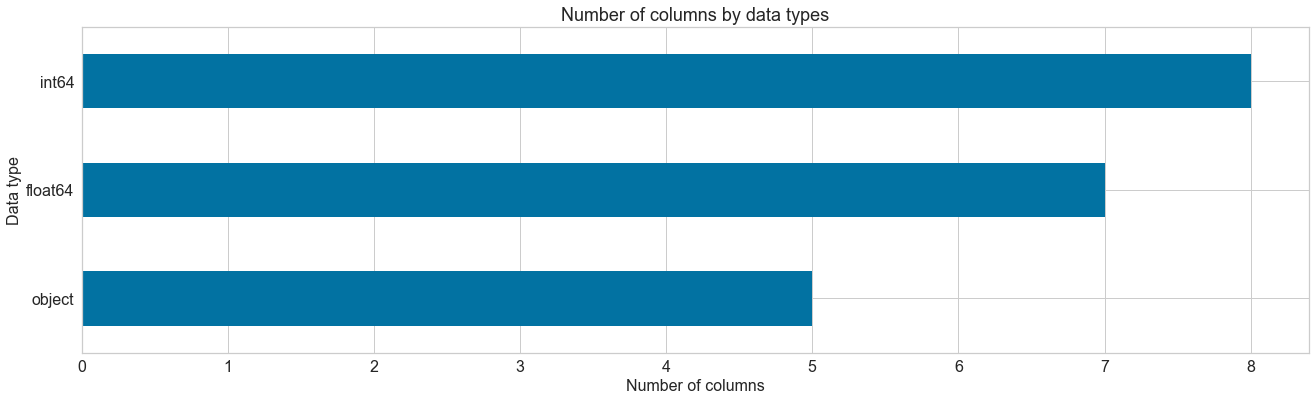

In [21]:

df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16)

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

Numerical Data:

Categorical Data:

### Check the column names

In [22]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### Summary Statistics

In [23]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


### Pandas Profiling

In [ ]:
#Generate a HTML report
profile = df.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Notes from pandas profiling report:

### Check for missing values

In [25]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


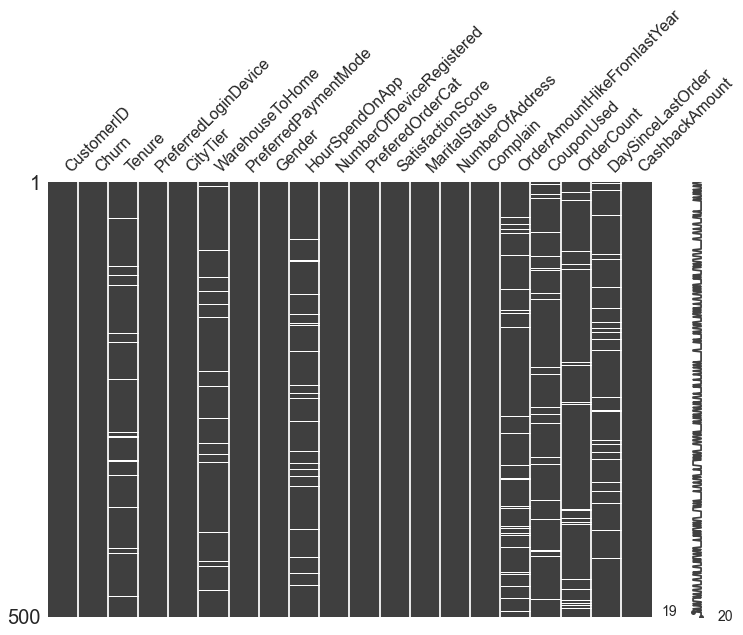

In [28]:
import missingno as msno
msno.matrix(df.sample(500), figsize=(12,8))
#msno.heatmap(df, figsize=(8, 8))

### Target Variable

In [41]:
df['Churn'].unique()

array([1, 0], dtype=int64)

### Check the distribution of 'Churn'

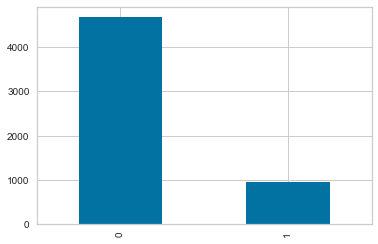

In [42]:
df['Churn'].value_counts().plot(kind='bar')

**NOTE: We see signs of imbalanced data**

### Correlations between predictors and target variable

Drop 'CustomerID'

In [43]:
df = df.drop(['CustomerID'], axis=1)

In [44]:
corr = df.corr()['Churn'].sort_values()

# Display correlations
print('8 Positive Correlations:')
print('-----------------------------------')
print(corr.tail(8))
print('\n7 Negative Correlations:')
print('------------------------------')
print(corr.head(7))

8 Positive Correlations:
-----------------------------------
HourSpendOnApp              0.018675
NumberOfAddress             0.043931
WarehouseToHome             0.076630
CityTier                    0.084703
SatisfactionScore           0.105481
NumberOfDeviceRegistered    0.107939
Complain                    0.250188
Churn                       1.000000
Name: Churn, dtype: float64

7 Negative Correlations:
------------------------------
Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154161
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
CouponUsed                    -0.008264
HourSpendOnApp                 0.018675
Name: Churn, dtype: float64


In [45]:
corr

Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154161
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
CouponUsed                    -0.008264
HourSpendOnApp                 0.018675
NumberOfAddress                0.043931
WarehouseToHome                0.076630
CityTier                       0.084703
SatisfactionScore              0.105481
NumberOfDeviceRegistered       0.107939
Complain                       0.250188
Churn                          1.000000
Name: Churn, dtype: float64

We can see that no predictors are highly correlated with the target

## Data Visualization

Types of graphs to create:
- 

### Pair plots across Churn

C:\Users\e_wor\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


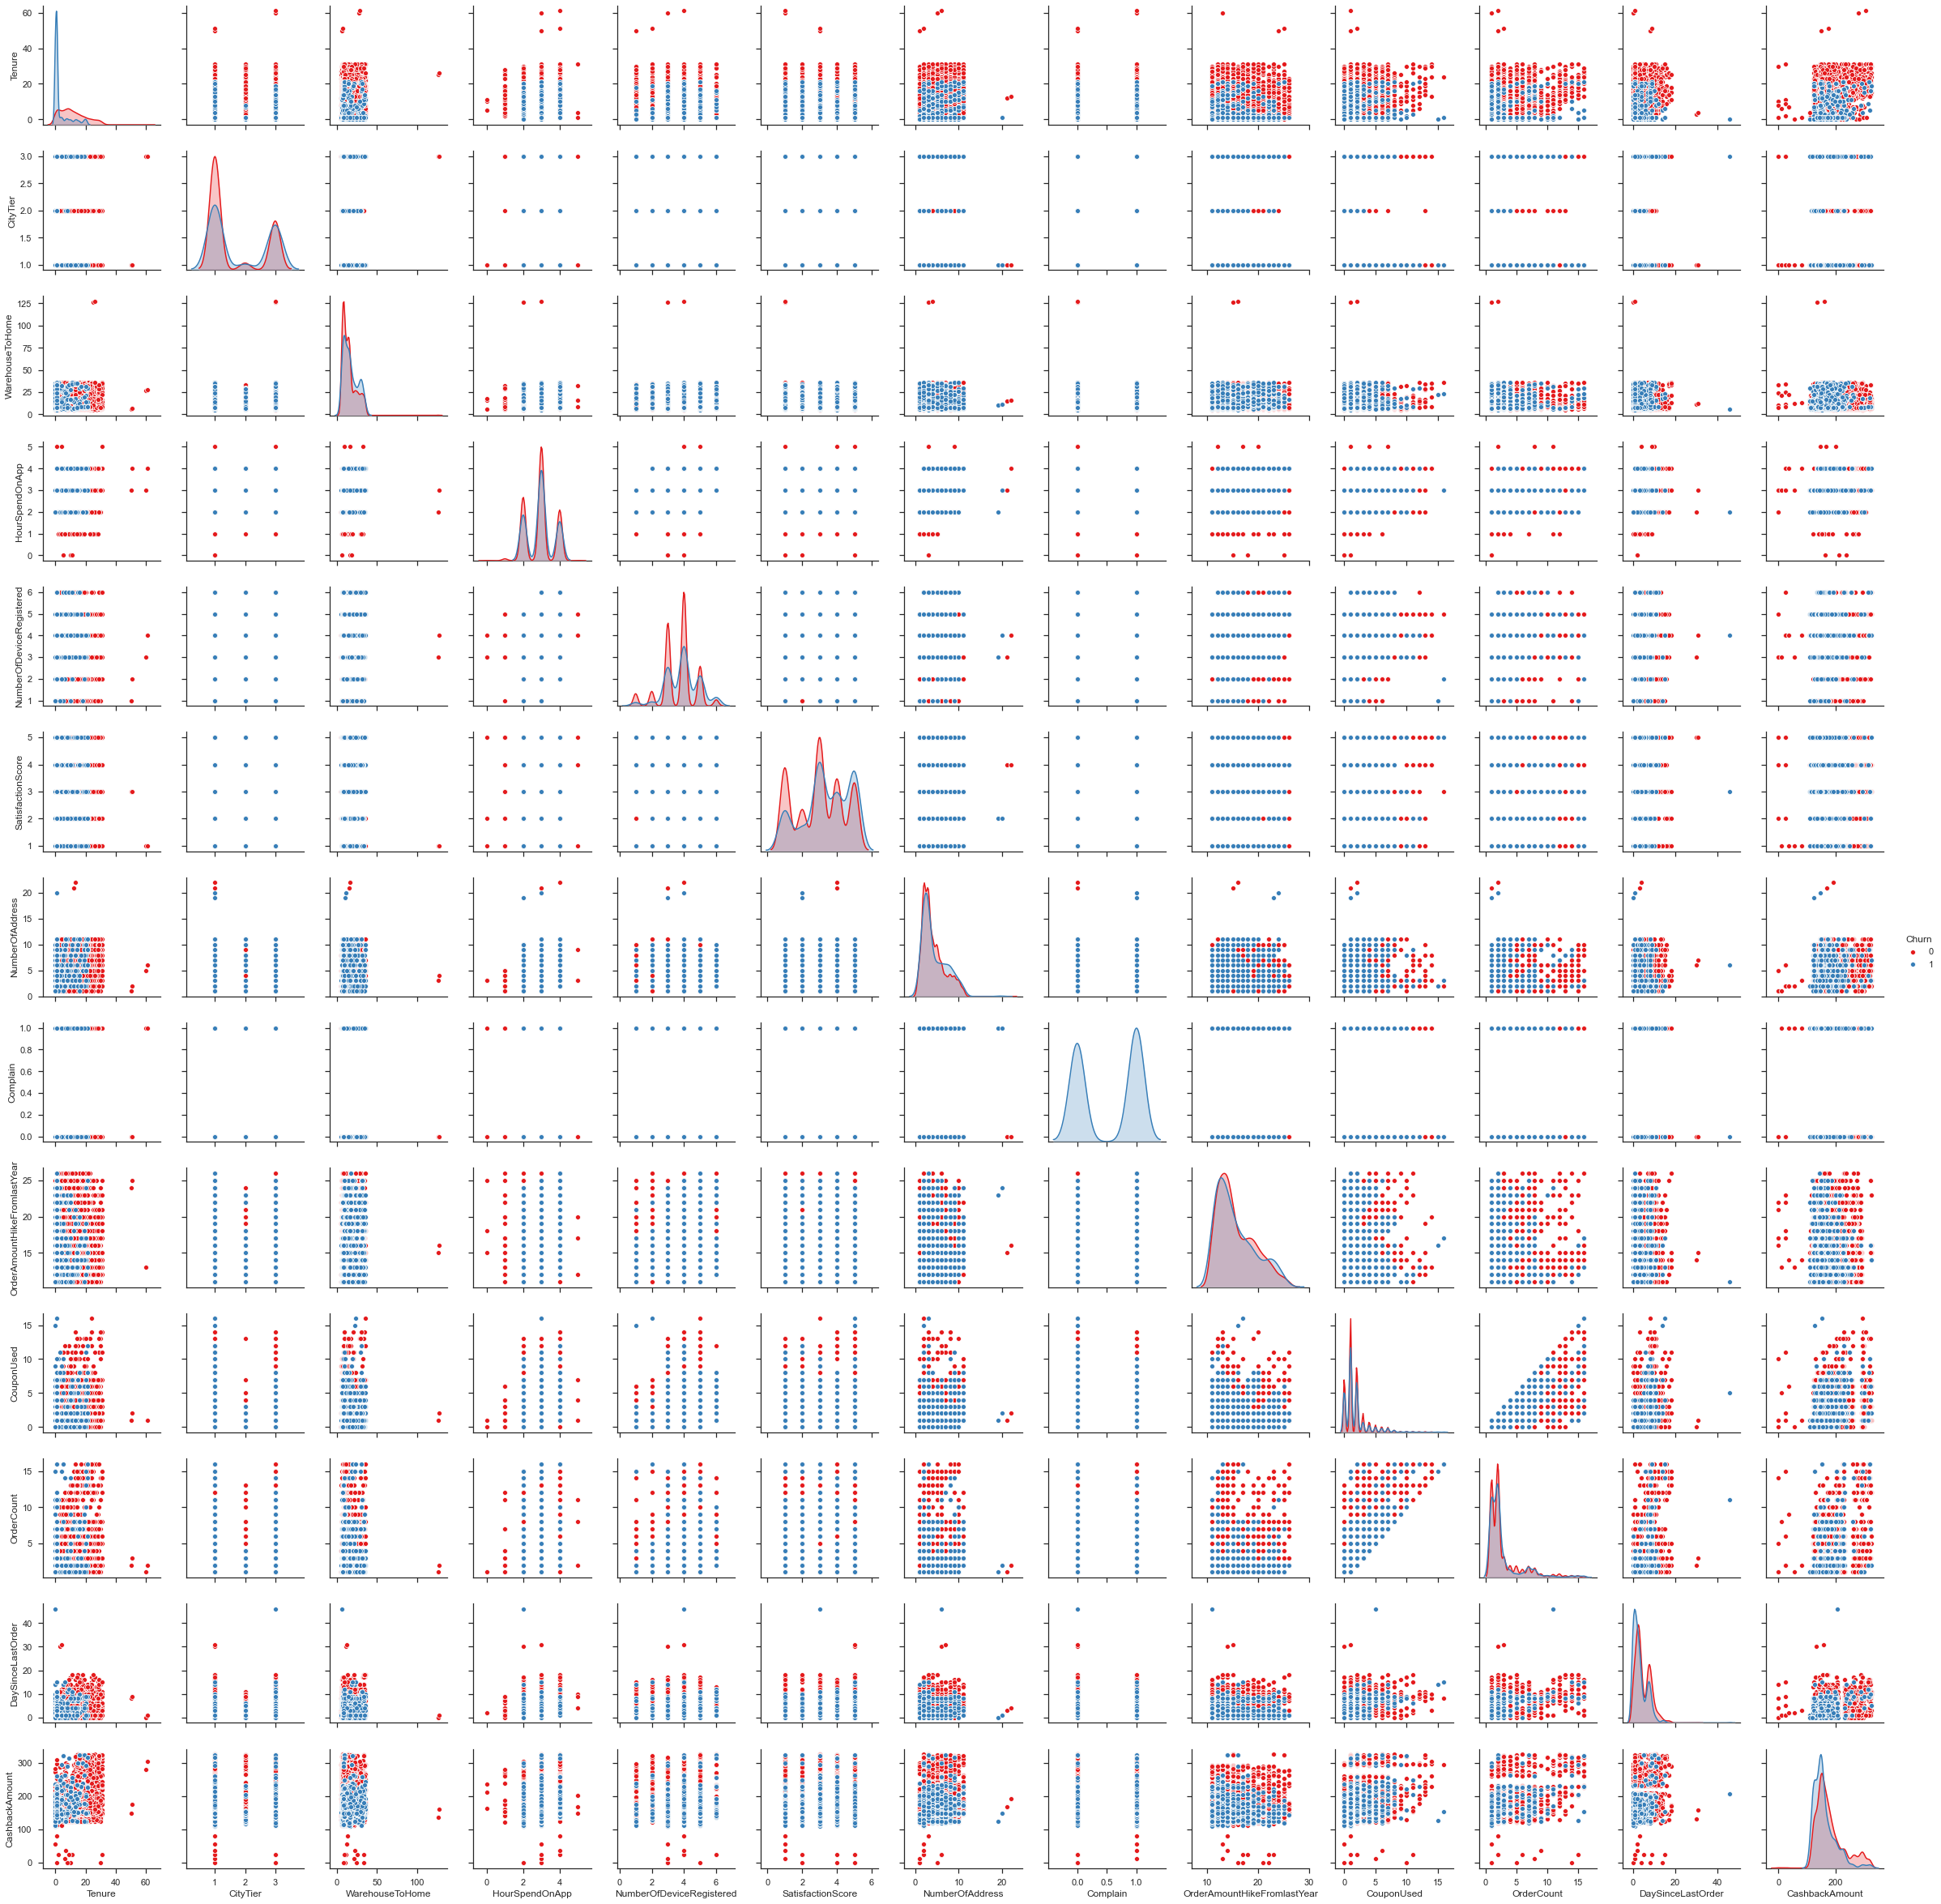

In [47]:
sns.set(style="ticks")

sns.pairplot(df, hue="Churn", palette="Set1")
plt.show()


###Specify which variables you want to see

#new_df = df.copy()
#vars = ["Variable 1", "Variable 2", "Variable 3"]
#p = pairplot(
#    new_df, vars=vars, hue="Churn", kind="reg"
#)

### Distribution of numerical variables

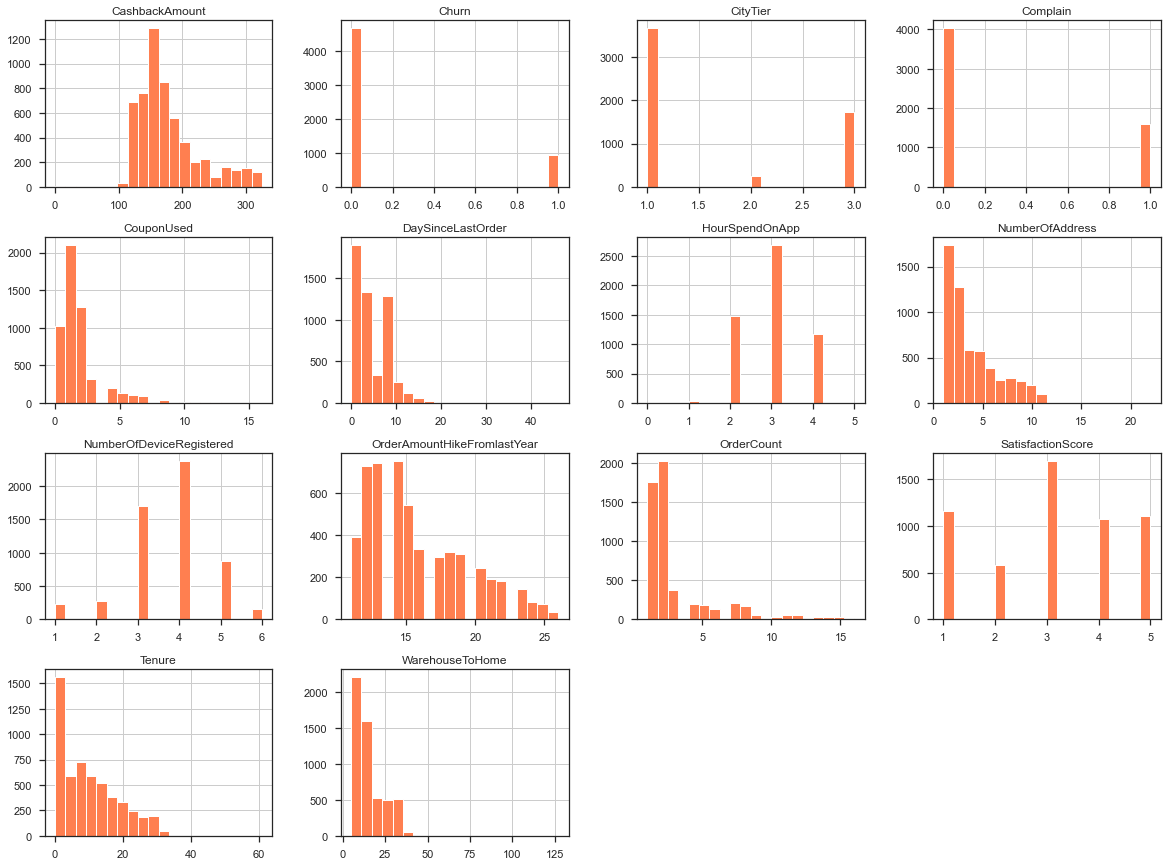

In [48]:
df.hist(bins=20, figsize=(20,15), color='coral')
plt.show();

### Distribution of Categorical Variables

Number of categories in each categorical variable

In [49]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [50]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Grid of boxplots of the categorical variables vs price_range

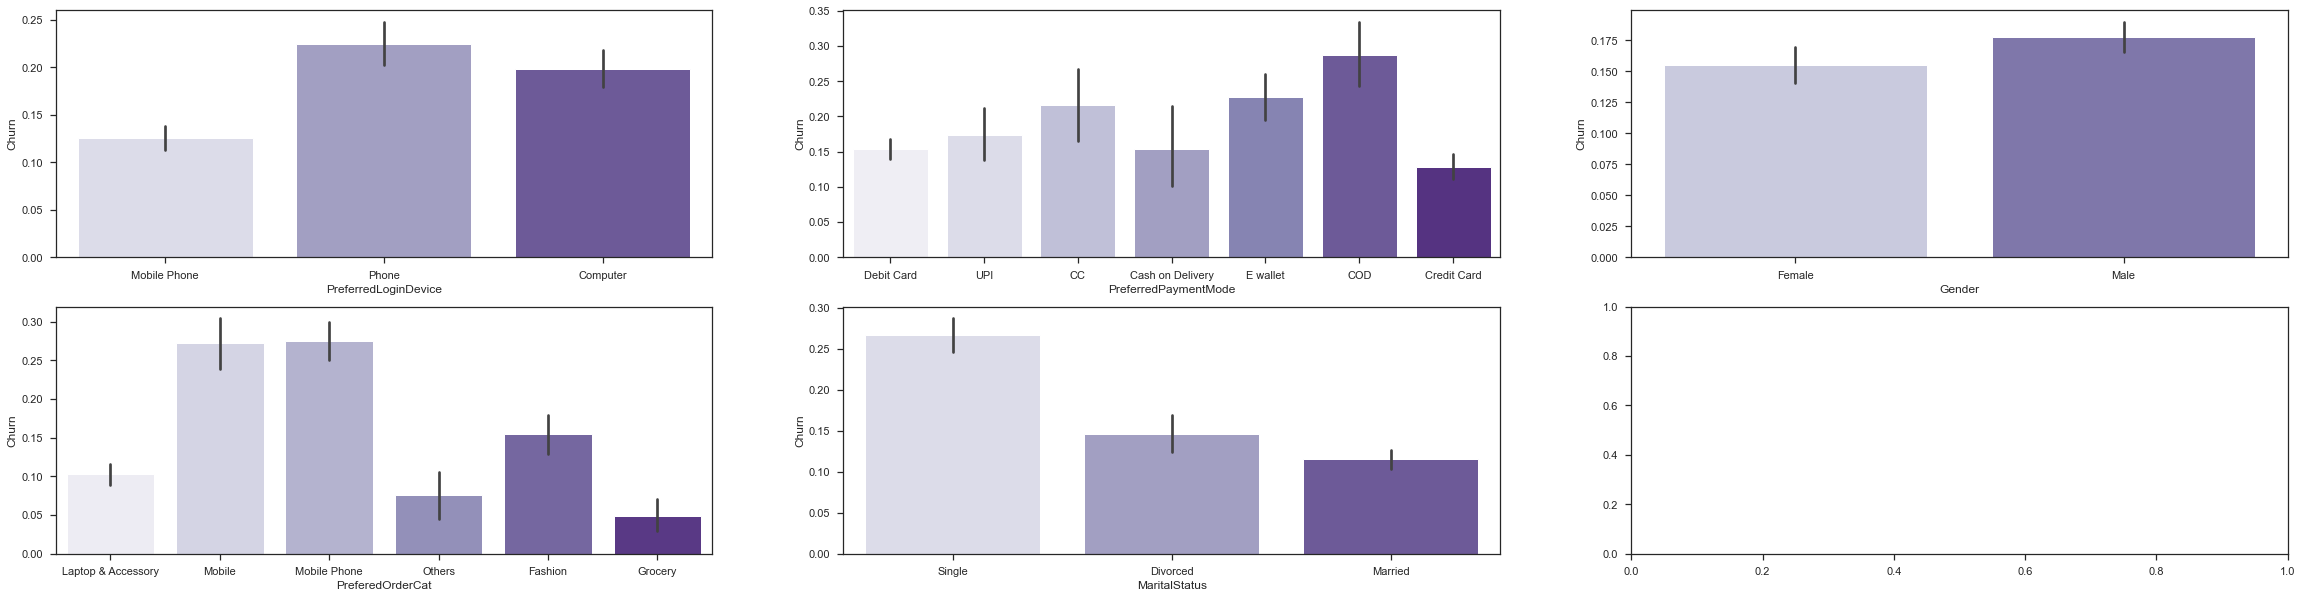

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(40,10))
axes = axes.flatten()

ax = sns.barplot(x ='PreferredLoginDevice', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[0])
ax = sns.barplot(x ='PreferredPaymentMode', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[1])
ax = sns.barplot(x ='Gender', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[2])
ax = sns.barplot(x ='PreferedOrderCat', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[3])
ax = sns.barplot(x ='MaritalStatus', y ='Churn', data = df, palette = 'Purples', orient='v', ax=axes[4])

### Data Cleaning

**INFORMATION LEAKAGE**

Should we consider this? Perhaps 'Satisfaction Score' could be leaking information?